DESCRIPTION

The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.

Data Dictionary
UserID – 4848 customers who provided a rating for each movie
Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

Data Considerations
   - All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
   - Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.

Analysis Task

-> Exploratory Data Analysis:

    - Which movies have maximum views/ratings?
    - What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
    - Define the top 5 movies with the least audience.

-> Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

    - Divide the data into training and test data
    - Build a recommendation model on training data
    - Make predictions on the test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Data Importing

In [3]:
data=pd.read_csv('Amazon - Movies and TV Ratings.csv')
data.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(4848, 207)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [6]:
data.isnull().sum()

user_id        0
Movie1      4847
Movie2      4847
Movie3      4847
Movie4      4846
            ... 
Movie202    4842
Movie203    4847
Movie204    4840
Movie205    4813
Movie206    4835
Length: 207, dtype: int64

In [7]:
df=data.fillna(value=0)
df

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4844,A1KLIKPUF5E88I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4845,A5HG6WFZLO10D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4846,A3UU690TWXCG1X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [8]:
df.shape

(4848, 207)

In [9]:
df.isnull().sum().any()

False

## Exploratory Data Analysis

In [10]:
# Which movies have maximum views/ratings?

In [11]:
df_altered=pd.melt(data,id_vars='user_id',value_vars=list(df.columns[1:]),var_name='Movies',value_name='Ratings')
df_altered

,user_id,Movies,Ratings
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [12]:
max_rating=df_altered.groupby('Movies')['Ratings'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'Ratings':'Ratings_Count'})
max_rating

,Movies,Ratings_Count
0,Movie127,2313
1,Movie140,578
2,Movie16,320
3,Movie103,272
4,Movie29,243
...,...,...
201,Movie45,1
202,Movie42,1
203,Movie41,1
204,Movie38,1


<AxesSubplot:title={'center':'Top 10 movies with maximum number of ratings'}, xlabel='Movies', ylabel='Ratings_Count'>

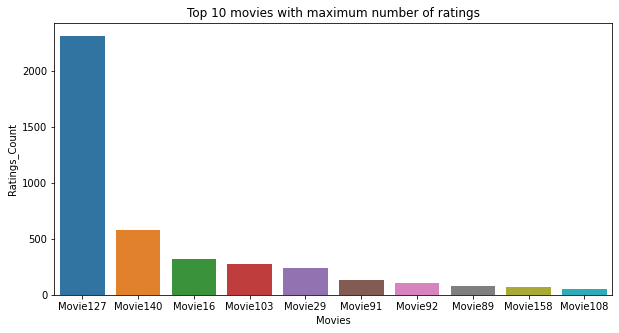

In [13]:
plt.figure(figsize=(10,5))
plt.title('Top 10 movies with maximum number of ratings')
sns.barplot(x=max_rating.head(10).Movies,y=max_rating.head(10).Ratings_Count,data=max_rating.head(10))

In [14]:
# What is the average rating for each movie? Define the top 5 movies with the maximum ratings.

In [15]:
avg_rating=df_altered.groupby('Movies')['Ratings'].mean().sort_values(ascending=False).to_frame().reset_index().rename(columns={'Ratings':'Ratings_Mean'})
avg_rating

,Movies,Ratings_Mean
0,Movie191,5.0
1,Movie189,5.0
2,Movie167,5.0
3,Movie168,5.0
4,Movie169,5.0
...,...,...
201,Movie154,1.0
202,Movie58,1.0
203,Movie144,1.0
204,Movie45,1.0


<AxesSubplot:title={'center':'Top 5 movies with average rating'}, xlabel='Movies', ylabel='Ratings_Mean'>

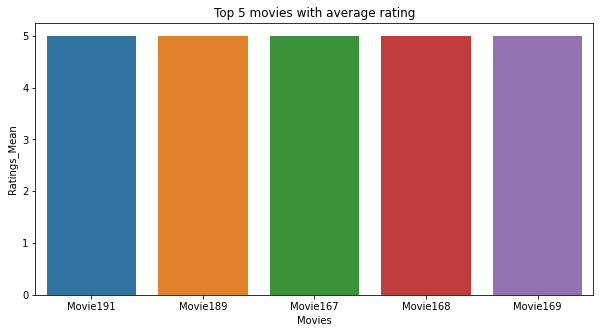

In [16]:
plt.figure(figsize=(10,5))
plt.title('Top 5 movies with average rating')
sns.barplot(x=avg_rating.head().Movies,y=avg_rating.head().Ratings_Mean,data=avg_rating.head())

In [17]:
max_mean_rating=max_rating.merge(avg_rating,on='Movies')
max_mean_rating

,Movies,Ratings_Count,Ratings_Mean
0,Movie127,2313,4.111976
1,Movie140,578,4.833910
2,Movie16,320,4.518750
3,Movie103,272,4.562500
4,Movie29,243,4.806584
...,...,...,...
201,Movie45,1,1.000000
202,Movie42,1,5.000000
203,Movie41,1,5.000000
204,Movie38,1,5.000000


<AxesSubplot:title={'center':'Top 5 movies with maximum ratings'}, xlabel='Movies', ylabel='Ratings_Mean'>

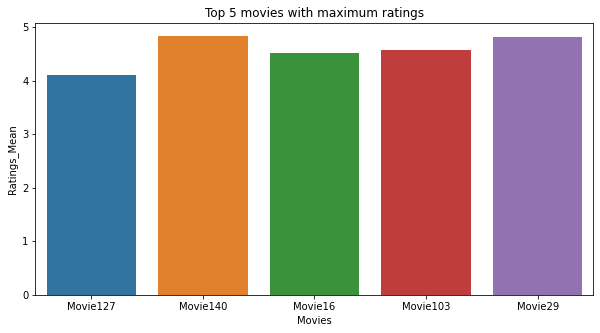

In [18]:
plt.figure(figsize=(10,5))
plt.title('Top 5 movies with maximum ratings')
sns.barplot(x=max_mean_rating.head().Movies,y=max_mean_rating.head().Ratings_Mean,data=max_mean_rating.head())

In [19]:
# Define the top 5 movies with the least audience.

In [20]:
max_mean_rating.tail()

,Movies,Ratings_Count,Ratings_Mean
201,Movie45,1,1.0
202,Movie42,1,5.0
203,Movie41,1,5.0
204,Movie38,1,5.0
205,Movie1,1,5.0


<AxesSubplot:title={'center':'Top 5 movies with least audience'}, xlabel='Movies', ylabel='Ratings_Mean'>

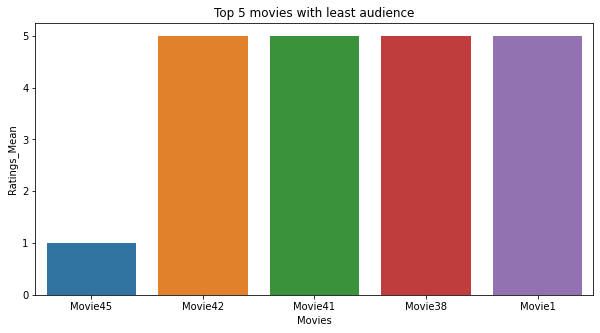

In [21]:
plt.figure(figsize=(10,5))
plt.title('Top 5 movies with least audience')
sns.barplot(x=max_mean_rating.tail().Movies,y=max_mean_rating.tail().Ratings_Mean,data=max_mean_rating.tail())

## Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

In [22]:
# Divide the data into training and test data

In [23]:
df_altered

,user_id,Movies,Ratings
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [24]:
from surprise import SVD,Reader, accuracy, Dataset
from surprise.model_selection import train_test_split

In [25]:
reader=Reader(rating_scale=(-1,10))
data2=Dataset.load_from_df(df_altered.fillna(0),reader=reader)

In [26]:
train_data,test_data=train_test_split(data2,test_size=0.25)

In [37]:
# Build a recommendation model on training data
# make predictions on the test data

In [28]:
model=SVD()
model.fit(train_data)

In [29]:
predictions=model.test(test_data)

In [30]:
accuracy.rmse(predictions)

RMSE: 0.2812


0.2811684130143467

In [31]:
user_id='A1IMQ9WMFYKWH5'
movie_id='Movie206'
rated=5.0
model.predict(user_id,movie_id,r_ui=rated,verbose=True)

user: A1IMQ9WMFYKWH5 item: Movie206   r_ui = 5.00   est = 0.07   {'was_impossible': False}


Prediction(uid='A1IMQ9WMFYKWH5', iid='Movie206', r_ui=5.0, est=0.06720219385869344, details={'was_impossible': False})

In [32]:
from surprise.model_selection import cross_validate

In [33]:
cross_validate(model,data2,measures=['RMSE','MAE'],cv=3,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2799  0.2787  0.2880  0.2822  0.0041  
MAE (testset)     0.0424  0.0427  0.0430  0.0427  0.0002  
Fit time          39.07   39.40   36.27   38.25   1.41    
Test time         3.52    3.32    3.30    3.38    0.10    


{'test_rmse': array([0.27992536, 0.27874074, 0.28797309]),
 'test_mae': array([0.0424223 , 0.04267379, 0.0429866 ]),
 'fit_time': (39.06631898880005, 39.40316987037659, 36.267441511154175),
 'test_time': (3.520315647125244, 3.3194706439971924, 3.299980401992798)}

In [34]:
def repeat(model_type,data_frame,min_,max_):
    reader=Reader(rating_scale=(min_,max_))
    data2=Dataset.load_from_df(data_frame,reader=reader)
    model=model_type
    print(cross_validate(model,data2,measures=['RMSE','MAE'],cv=3,verbose=True))
    print('#'*10)
    user_id='A1IMQ9WMFYKWH5'
    movie_id='Movie206'
    rated=5.0
    model.predict(user_id,movie_id,r_ui=rated,verbose=True)
    print('#'*10)

In [35]:
df2=data.iloc[:1000,:50]
df_melt=pd.melt(df2,id_vars='user_id',value_vars=list(df2.columns[1:]),var_name='Movies',value_name='Ratings')
df_melt

,user_id,Movies,Ratings
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
48995,A1ZI2W162HAVWD,Movie49,NaN
48996,A3H4O74WCKOO9O,Movie49,NaN
48997,A2E3XQQZSA2VXK,Movie49,NaN
48998,A3A570DAI2Z0RL,Movie49,NaN


In [36]:
repeat(SVD(),df_melt.fillna(0),-1,10)
repeat(SVD(),df_melt.fillna(df_melt.mean()),-1,10)
repeat(SVD(),df_melt.fillna(df_melt.median()),-1,10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.4814  0.4621  0.4830  0.4755  0.0095  
MAE (testset)     0.1162  0.1100  0.1188  0.1150  0.0037  
Fit time          1.68    1.69    1.66    1.68    0.01    
Test time         0.12    0.41    0.11    0.21    0.14    
{'test_rmse': array([0.48144042, 0.46208025, 0.48296257]), 'test_mae': array([0.11620684, 0.10999703, 0.11876541]), 'fit_time': (1.6774911880493164, 1.6886625289916992, 1.6604340076446533), 'test_time': (0.11535406112670898, 0.40984630584716797, 0.11357378959655762)}
##########
user: A1IMQ9WMFYKWH5 item: Movie206   r_ui = 5.00   est = 0.06   {'was_impossible': False}
##########
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.1020  0.1066  0.0896  0.0994  0.0072  
MAE (testset)     0.0248  0.0261  0.0249  0.0252  0.0006  
Fit time          1.65    1.69    1.66 

In [ ]:
reader=Reader(rating_scale=(-1,10))
data2=Dataset.load_from_df(df_altered.fillna(df_altered.mean()),reader=reader)